<!--
jupytext:
  text_representation:
    extension: .md
    format_name: myst
kernelspec:
  name: python3
  display_name: Python 3
-->

(bbooks:test-interactive)=
# Test interactive pages

Some text

5+10 = 15


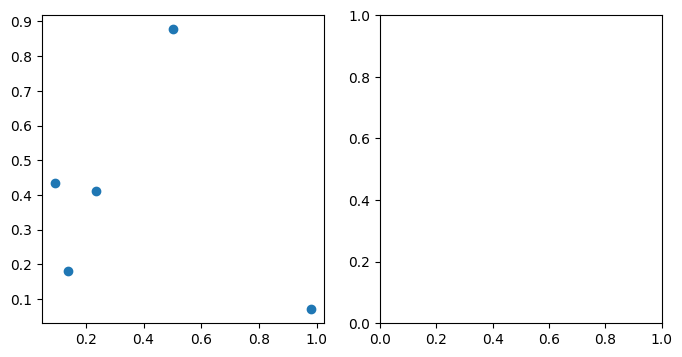

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = 5
y = 10
print(f"{x}+{y} = {x+y}")

fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].plot(np.random.random(5), np.random.random(5),'o')


(ch:interactivemarkdown)=
# Interactive content in MarkDown

## Plots

In a printed book, graphs can be included as figures. We can do the same in an online book, but we can also do much more. The simplest extension is to not create a figure file, which we then include, but to create the figure from code. The upshot of this approach is that students can see how the figure is made. For example, {numref}`fig:free_energy_density` below shows the van der Waals free energy density,
```{index} Van der Waals free energy density
```
$$
f_\mathrm{VdW}(\rho) = k_\mathrm{B} T \rho \left[\ln\left(\frac{\rho}{1-b \rho}\right) - 1\right] - a \rho^2,
$$ (VdWfreeenergydensity)

combined with the common tangent construction to obtain the densities of coexisting phases.
```{index} common tangent construction.
```

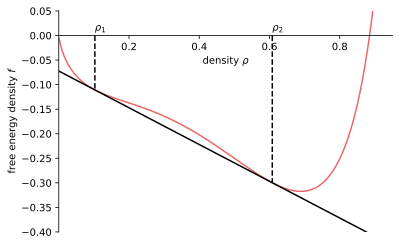

In [2]:
%config InlineBackend.figure_formats = ['svg']
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue
from scipy.optimize import fsolve

# Global parameters
kbt = 1 # --> all energy (f, a, ...) in units of k_B T
linear_coefficient = 2.5 # add a term linear in rho to f_vdw for a nicer plot
# this linear term has no impact on the conditions for phase coexistence

# Colors
grey = '#eeeeee' # light grey fill
line = '#e96868' # red line
nucleatn_color = '#6a8ba4' # dark blue for nucleation&growth
spinodal_color = '#BBDEF0' # light blue for spinodal decomposition

def f_vdw(rho, a, b):
    """
    Calculates the free energy density for a Van der Waals fluid.
    """
    return kbt*rho*(np.log(rho/(1-b*rho)) - 1) - a*rho**2 + linear_coefficient*kbt*rho

def f_vdw_prime(rho, a, b):
    """
    Calculates the derivative w.r.t. the density rho of the free energy
    density of a VdW fluid.
    """
    return kbt*np.log(rho/(1-b*rho)) + kbt*b*rho/(1-b*rho) - 2*a*rho + linear_coefficient*kbt

def conditions_for_coexistence(x, a, b):
    """
    Function that should be zero when phases coexist. A vector with
    one element mu1 - mu2, and one element p1 - p2.
    """
    rho1 = x[0]
    rho2 = x[1]
    mu1 = f_vdw_prime(rho1, a, b)
    mu2 = f_vdw_prime(rho2, a, b)
    f1 = f_vdw(rho1, a, b)
    f2 = f_vdw(rho2, a, b)
    mu_deficit = mu1 - mu2
    p_deficit  = rho1*mu1 - f1 - rho2*mu2 + f2
    return [mu_deficit, p_deficit]

def f_mix(rho_av, a, b):
    """
    Free energy density for a mixture of gas (density rho1) and liquid (density
    rho2). The gas and liquid densities (rho1 and rho2) are found numerically.
    """
    rhosol = fsolve(conditions_for_coexistence, x0=[0.05, 0.7], args=(a,b))
    rho1 = rhosol[0]
    rho2 = rhosol[1]
    return f_vdw(rho1, a, b) + (f_vdw(rho2, a, b) - f_vdw(rho1, a, b))/(rho2-rho1) * (rho_av - rho1)

## Prepare all the graphs that are to be plotted
# Define the range of densities to plot
rho = np.linspace(0.001, 0.95, 1000)

# Set the parameters a and b
a = 4
b = 1

# Find the densities at which the gas and liquid phases coexist by solving
# numerically. If you use different a and b you might need to change the
# guesses, x0.
rhosol = fsolve(conditions_for_coexistence, x0=[0.05, 0.8], args=(a,b))

## Make the plot
fig, ax = plt.subplots(figsize=(6,4))

# Put axes on the zeros
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Remove label at 0.0
ax.set_xticks([0.2, 0.4, 0.6, 0.8])

# Plot the graphs
ax.plot(rho, f_vdw(rho, a, b), color=line)
ax.plot(rho, f_mix(rho, a, b), 'k')

# Create markers rho1 and rho2
rho1_marker_y = np.linspace(0, f_vdw(rhosol[0], a, b), 10)
rho1_marker_x = np.ones(rho1_marker_y.shape)*rhosol[0]
ax.plot(rho1_marker_x, rho1_marker_y, 'k--')
rho2_marker_y = np.linspace(0, f_vdw(rhosol[1], a, b), 10)
rho2_marker_x = np.ones(rho2_marker_y.shape)*rhosol[1]
ax.plot(rho2_marker_x, rho2_marker_y, 'k--')
ax.text(rhosol[0], 0.01, r'$\rho_1$')
ax.text(rhosol[1], 0.01, r'$\rho_2$')

# Labels
ax.set_xlabel(r'density $\rho$'), ax.set_ylabel(r'free energy density $f$')

# Limits
ax.set_xlim([0, rho[-1]])
ax.set_ylim([-0.4, 0.05])

# Save graph to load in figure later (special Jupyter Book feature)
glue("free_energy_density", fig, display=False)

```{glue:figure} free_energy_density
:name: "fig:free_energy_density"

The free energy density (red curve), with a "common tangent construction"
(black straight line), connecting two points with the same slope, by a straight
line with the same slope.
```


## Interactive plots

```{index} interactive plots
```

We can make the plot in {numref}`fig:free_energy_density` even more useful by making it interactive, letting students see how the plot changes if we change a parameter, *without* having access in the code. The interactive version is shown in the figure below.

In [3]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
    row=1, col=2
)

sliders = [dict(
    active=3,
    currentvalue={"prefix": "a/b: "},
    steps=range(5)
)]

fig.update_layout(
    sliders=sliders,
    legend_title="Legend",
)
fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")

fig
# fig.show()


ValueError: 
    Invalid value of type 'builtins.range' received for the 'steps' property of layout.slider
        Received value: range(0, 5)

    The 'steps' property is a tuple of instances of
    Step that may be specified as:
      - A list or tuple of instances of plotly.graph_objs.layout.slider.Step
      - A list or tuple of dicts of string/value properties that
        will be passed to the Step constructor

        Supported dict properties:
            
            args
                Sets the arguments values to be passed to the
                Plotly method set in `method` on slide.
            execute
                When true, the API method is executed. When
                false, all other behaviors are the same and
                command execution is skipped. This may be
                useful when hooking into, for example, the
                `plotly_sliderchange` method and executing the
                API command manually without losing the benefit
                of the slider automatically binding to the
                state of the plot through the specification of
                `method` and `args`.
            label
                Sets the text label to appear on the slider
            method
                Sets the Plotly method to be called when the
                slider value is changed. If the `skip` method
                is used, the API slider will function as normal
                but will perform no API calls and will not bind
                automatically to state updates. This may be
                used to create a component interface and attach
                to slider events manually via JavaScript.
            name
                When used in a template, named items are
                created in the output figure in addition to any
                items the figure already has in this array. You
                can modify these items in the output figure by
                making your own item with `templateitemname`
                matching this `name` alongside your
                modifications (including `visible: false` or
                `enabled: false` to hide it). Has no effect
                outside of a template.
            templateitemname
                Used to refer to a named item in this array in
                the template. Named items from the template
                will be created even without a matching item in
                the input figure, but you can modify one by
                making an item with `templateitemname` matching
                its `name`, alongside your modifications
                (including `visible: false` or `enabled: false`
                to hide it). If there is no template or no
                matching item, this item will be hidden unless
                you explicitly show it with `visible: true`.
            value
                Sets the value of the slider step, used to
                refer to the step programatically. Defaults to
                the slider label if not provided.
            visible
                Determines whether or not this step is included
                in the slider.


In [ ]:
# [remove-input]

import plotly.graph_objects as go

def f_vdw_doubleprime(rho, a, b):
    """
    Calculates the second derivative of the free energy density for a
    Van der Waals fluid.
    """
    return kbt/(rho*(1-b*rho)) + kbt*b/(1-b*rho)**2 - 2*a

range_a = np.arange(27.0/8.0, 5, 0.1)

## Create plot
fig = go.Figure()

base_traces = 0 # Number of traces that are always visible

# Add traces, one for each slider step
for a in range_a:
    rhosol = fsolve(conditions_for_coexistence, x0=[0.05, 0.7], args=(a,b))
    rho_turningpoints = fsolve(f_vdw_doubleprime, x0=[0.1, 0.5], args=(a,b))
    fig.add_trace(
        go.Scatter(
            visible=False,
            x=[rhosol[0], rhosol[0], rho_turningpoints[0], rho_turningpoints[0]],
            y=[0, -1, -1, 0],
            fill="toself",
            mode='lines',
            name='nucleation and growth',
            line=dict(color=nucleatn_color)))
    fig.add_trace(
        go.Scatter(
            visible=False,
            x=[rho_turningpoints[1], rho_turningpoints[1], rhosol[1], rhosol[1]],
            y=[0, -1, -1, 0],
            fill="toself",
            mode='lines',
            name='nucleation and growth',
            line=dict(color=nucleatn_color),
            showlegend=False))
    fig.add_trace(
        go.Scatter(
            visible=False,
            x=[rho_turningpoints[0], rho_turningpoints[0], rho_turningpoints[1], rho_turningpoints[1]],
            y=[0, -1, -1, 0],
            fill="toself",
            mode='lines',
            name='spinodal decomposition',
            line=dict(color=spinodal_color)))
    fig.add_trace(
        go.Scatter(
            visible=False,
            x=rho,
            y=f_vdw(rho, a, b),
            line=dict(color=line),
            mode='lines',
            name='VdW fluid'))
    fig.add_trace(
        go.Scatter(
            visible=False,
            x=rho,
            y=f_mix(rho, a, b),
            line=dict(color='#000000'),
            mode='lines',
            name='phase separated'))

traces_per_step = 5 # Number of traces per value of a

# Show the traces for one value of a when loading the plot (initial setup)
active_a_index = 5
for i in range(traces_per_step):
    curr_idx = int(base_traces + active_a_index*traces_per_step + i)
    fig.data[curr_idx].visible = True

# Create and add slider
steps = []
for i in range(0, range_a.shape[0]):
    visarray = [False] * len(fig.data)
    visarray[0:base_traces] = [True] * base_traces
    curr_idx = int(base_traces + i * traces_per_step)
    next_idx = int(base_traces + (i+1) * traces_per_step)
    visarray[curr_idx:next_idx] = [True] * traces_per_step
    step = dict(
        method="update",
        args=[{"visible": visarray}],
        label=round(range_a[i], 1)
    )
    steps.append(step)

sliders = [dict(
    active=active_a_index,
    currentvalue={"prefix": "a/b: "},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    legend_title="Legend",
)

fig.update_xaxes(title_text=r'density $\rho$', range=[rho[0], rho[-1]])

# Update yaxis properties
fig.update_yaxes(title_text=r'free energy density $f$', range=[-1, 0])

fig



Credit: Examples from Jos Zwanikken's online book for [NB2220 Statistical physics for Nanobiology](http://tnw-nb-open-courses.tudelft.nl/NB2220/), coded by Lukas de Kam.